# Import Dataset from Kaggle

In [18]:
!kaggle competitions download -c aptos2019-blindness-detection -p /projects/academic/shamsadp/medxformer_input/

100%|█████████████████████████████████████▉| 9.50G/9.51G [02:05<00:00, 97.3MB/s]
100%|██████████████████████████████████████| 9.51G/9.51G [02:05<00:00, 81.3MB/s]


In [ ]:
!unzip /projects/academic/shamsadp/medxformer_input/aptos2019-blindness-detection.zip -d /projects/academic/shamsadp/medxformer_input/diabetes
!rm /projects/academic/shamsadp/medxformer_input/aptos2019-blindness-detection.zip

In [20]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset -p /projects/academic/shamsadp/medxformer_input/

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 95%|█████████████████████████████████████▉  | 141M/149M [00:02<00:00, 93.3MB/s]
100%|████████████████████████████████████████| 149M/149M [00:02<00:00, 52.2MB/s]


In [ ]:
!unzip /projects/academic/shamsadp/medxformer_input/brain-tumor-mri-dataset.zip -d /projects/academic/shamsadp/medxformer_input/brain
!rm /projects/academic/shamsadp/medxformer_input/brain-tumor-mri-dataset.zip

In [22]:
!kaggle datasets download nodoubttome/skin-cancer9-classesisic -p /projects/academic/shamsadp/medxformer_input/

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
 99%|███████████████████████████████████████▋| 780M/786M [00:08<00:00, 94.6MB/s]
100%|████████████████████████████████████████| 786M/786M [00:08<00:00, 98.9MB/s]


In [ ]:
!unzip /projects/academic/shamsadp/medxformer_input/skin-cancer9-classesisic.zip -d /projects/academic/shamsadp/medxformer_input/skin
!rm /projects/academic/shamsadp/medxformer_input/skin-cancer9-classesisic.zip

In [24]:
!kaggle datasets download paultimothymooney/kermany2018 -p /projects/academic/shamsadp/medxformer_input/

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/kermany2018
License(s): CC-BY-NC-SA-4.0
100%|█████████████████████████████████████▉| 10.8G/10.8G [04:00<00:00, 56.8MB/s]
100%|██████████████████████████████████████| 10.8G/10.8G [04:00<00:00, 48.5MB/s]


In [ ]:
!unzip /projects/academic/shamsadp/medxformer_input/kermany2018.zip -d /projects/academic/shamsadp/medxformer_input/retina

!rm /projects/academic/shamsadp/medxformer_input/kermany2018.zip

In [1]:
!kaggle datasets download nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone -p /projects/academic/shamsadp/medxformer_input/

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
100%|█████████████████████████████████████▉| 1.51G/1.52G [00:53<00:00, 34.3MB/s]
100%|██████████████████████████████████████| 1.52G/1.52G [00:53<00:00, 30.2MB/s]


In [ ]:
!unzip /projects/academic/shamsadp/medxformer_input/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip -d /projects/academic/shamsadp/medxformer_input/kidney
!rm /projects/academic/shamsadp/medxformer_input/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

## Import Librarires

In [3]:
import os
import shutil
import random

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

## Original Dataset sizes

In [4]:
def calculate_dataset_size_in_gb(dataset_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    total_size_gb = total_size / (1024**3)
    return total_size_gb

In [6]:
# Diabetic Dataset
data_aptos_diabetic = '/projects/academic/shamsadp/medxformer_input/diabetes/'
calculate_dataset_size_in_gb(data_aptos_diabetic)

9.515247610397637

In [10]:
# Kidney Dataset
data_kidney_tumor = '/projects/academic/shamsadp/medxformer_input/kidney'
calculate_dataset_size_in_gb(data_kidney_tumor)

1.5488697560504079

In [8]:
# Brain Dataset
data_brain_tumor = '/projects/academic/shamsadp/medxformer_input/brain'
calculate_dataset_size_in_gb(data_brain_tumor)

0.14771194849163294

In [9]:
# Skin Dataset
data_skin_cancer = '/projects/academic/shamsadp/medxformer_input/skin'
calculate_dataset_size_in_gb(data_skin_cancer)

0.7692525973543525

In [11]:
# Retina Dataset
data_retinal_oct = '/projects/academic/shamsadp/medxformer_input/retina'
calculate_dataset_size_in_gb(data_retinal_oct)

10.833787091076374

## Classes in different dataset

#### **Diabetic Dataset**
#### APTOS 2019 Blindness Detection - Classes

In [13]:
csv_path = '/projects/academic/shamsadp/medxformer_input/diabetes/train.csv'
df = pd.read_csv(csv_path)
unique_classes = df['diagnosis'].unique()
print(f"APTOS 2019 Blindness Detection: Classes found - {unique_classes}")

APTOS 2019 Blindness Detection: Classes found - [2 4 1 0 3]


0: No Diabetic Retinopathy (No DR)

1: Mild Diabetic Retinopathy

2: Moderate Diabetic Retinopathy

3: Severe Diabetic Retinopathy

4: Proliferative Diabetic Retinopathy

In [14]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [15]:
csv_path = '/projects/academic/shamsadp/medxformer_input/diabetes/train.csv'
df = pd.read_csv(csv_path)

label_mapping = {
    0: 'No_Diabetic_Retinopathy',
    1: 'Mild_Diabetic_Retinopathy',
    2: 'Moderate_Diabetic_Retinopathy',
    3: 'Severe_Diabetic_Retinopathy',
    4: 'Proliferative_Diabetic_Retinopathy'
}

df['diagnosis'] = df['diagnosis'].map(label_mapping)
output_dir = '/projects/academic/shamsadp/medxformer_input/diabetes/mapping'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'aptos2019_with_labels.csv')
df.to_csv(output_path, index=False)
df.head()

,id_code,diagnosis
0,000c1434d8d7,Moderate_Diabetic_Retinopathy
1,001639a390f0,Proliferative_Diabetic_Retinopathy
2,0024cdab0c1e,Mild_Diabetic_Retinopathy
3,002c21358ce6,No_Diabetic_Retinopathy
4,005b95c28852,No_Diabetic_Retinopathy


#### **Brain Dataset**
#### Brain Tumor MRI Dataset - Classes

In [16]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/brain/Training'

def check_classes_from_directory(dataset_path):
    try:
        classes = os.listdir(dataset_path)
        return classes
    except FileNotFoundError:
        return "Dataset path not found"

classes = check_classes_from_directory(dataset_path)
print(f"Classes found in Brain Tumor MRI Dataset: {classes}")

Classes found in Brain Tumor MRI Dataset: ['glioma', 'meningioma', 'notumor', 'pituitary']


#### **Kidney Dataset**
#### CT KIDNEY DATASET: Normal-Cyst-Tumor and Stone - Classes

In [18]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/kidney/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

def check_classes_from_directory(dataset_path):
    try:
        classes = os.listdir(dataset_path) 
        return classes
    except FileNotFoundError:
        return "Dataset path not found"

classes = check_classes_from_directory(dataset_path)
print(f"Classes found in CT Kidney Dataset: {classes}")

Classes found in CT Kidney Dataset: ['Cyst', 'Normal', 'Stone', 'Tumor']


#### **Skin Dataset**
#### Skin Cancer ISIC - Classes

In [21]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/skin/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

def check_classes_from_directory(dataset_path):
    try:
        classes = os.listdir(dataset_path) 
        return classes
    except FileNotFoundError:
        return "Dataset path not found"

classes = check_classes_from_directory(dataset_path)
print(f"Classes found in Skin Cancer ISIC Dataset: {classes}")


Classes found in Skin Cancer ISIC Dataset: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Retina Dataset**
#### Retinal OCT Images (optical coherence tomography) - Classes

In [22]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/retina/OCT2017 /train'

def check_classes_from_directory(dataset_path):
    try:
        classes = os.listdir(dataset_path)  
        return classes
    except FileNotFoundError:
        return "Dataset path not found"

classes = check_classes_from_directory(dataset_path)
print(f"Classes found in OCT2017 Dataset: {classes}")


Classes found in OCT2017 Dataset: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


## Images sizes and information for different datasets

#### **Diabetic Dataset**
#### APTOS 2019 Blindness Detection - Image Info

In [23]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/diabetes/train_images'
def calculate_image_properties(dataset_path, image_extensions=('.png', '.jpg', '.jpeg')):
    total_size = 0
    total_width = 0
    total_height = 0
    num_images = 0
    
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions):
                fp = os.path.join(dirpath, f)
                
                try:
                    with Image.open(fp) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue
                
                total_size += os.path.getsize(fp)
                num_images += 1

    if num_images > 0:
        average_size_mb = total_size / num_images / (1024**2)
        average_width = total_width / num_images
        average_height = total_height / num_images
    else:
        average_size_mb = 0
        average_width = 0
        average_height = 0

    return average_size_mb, average_width, average_height, num_images  

avg_size_mb, avg_width, avg_height, num_images = calculate_image_properties(dataset_path)
print(f"APTOS 2019 Blindness Detection Dataset:\nNumber of images: {num_images}")
print(f"Average image size: {avg_size_mb:.2f} MB")
print(f"Average width: {avg_width:.2f} pixels, Average height: {avg_height:.2f} pixels")


APTOS 2019 Blindness Detection Dataset:
Number of images: 3662
Average image size: 2.24 MB
Average width: 2015.18 pixels, Average height: 1526.83 pixels


In [24]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/diabetes/train_images'
def check_image_size_consistency(dataset_path, image_extensions=('.png', '.jpg', '.jpeg')):
    dimensions = set()
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions): 
                fp = os.path.join(dirpath, f)
                try:
                    with Image.open(fp) as img:
                        dimensions.add(img.size)
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue
    return dimensions 
    
unique_dimensions = check_image_size_consistency(dataset_path)
if len(unique_dimensions) == 1:
    print(f"All images have the same size: {unique_dimensions.pop()}")
else:
    print(f"Images have different sizes: {unique_dimensions}")


Images have different sizes: {(474, 358), (2896, 1944), (3216, 2136), (2416, 1736), (2048, 1536), (2144, 1424), (640, 480), (2146, 1764), (1467, 1110), (819, 614), (2588, 1958), (1476, 1117), (1050, 1050), (4288, 2848), (1504, 1000), (3388, 2588), (1844, 1226)}


#### **Brain Dataset**
#### Brain Tumor MRI Dataset - Image Info

In [25]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/brain/Training'

def calculate_image_properties(dataset_path, image_extensions=('.png', '.jpg', '.jpeg')):
    total_size = 0
    total_width = 0
    total_height = 0
    num_images = 0
    
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions):  
                fp = os.path.join(dirpath, f)
                
                try:
                    with Image.open(fp) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue
                
                total_size += os.path.getsize(fp)
                num_images += 1

    if num_images > 0:
        average_size_mb = total_size / num_images / (1024**2) 
        average_width = total_width / num_images
        average_height = total_height / num_images
    else:
        average_size_mb = 0
        average_width = 0
        average_height = 0

    return average_size_mb, average_width, average_height, num_images 

avg_size_mb, avg_width, avg_height, num_images = calculate_image_properties(dataset_path)

print(f"Brain Tumor MRI Dataset:\nNumber of images: {num_images}")
print(f"Average image size: {avg_size_mb:.2f} MB")
print(f"Average width: {avg_width:.2f} pixels, Average height: {avg_height:.2f} pixels")


Brain Tumor MRI Dataset:
Number of images: 5712
Average image size: 0.02 MB
Average width: 451.56 pixels, Average height: 453.88 pixels


In [26]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/brain/Training'
def check_image_size_consistency(dataset_path, image_extensions=('.png', '.jpg', '.jpeg', '.tiff')):
    dimensions = set()
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions):  
                fp = os.path.join(dirpath, f)
                
                try:
                    with Image.open(fp) as img:
                        dimensions.add(img.size) 
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue

    return dimensions 

unique_dimensions = check_image_size_consistency(dataset_path)

if len(unique_dimensions) == 1:
    print(f"All images have the same size: {unique_dimensions.pop()}")
else:
    print(f"Images have different sizes: {unique_dimensions}")

Images have different sizes: {(491, 624), (206, 244), (409, 442), (503, 369), (430, 483), (728, 725), (201, 251), (289, 354), (554, 554), (236, 226), (214, 216), (229, 214), (733, 781), (229, 223), (235, 257), (411, 501), (329, 310), (645, 439), (434, 512), (227, 262), (528, 528), (590, 332), (209, 241), (407, 485), (630, 423), (300, 359), (236, 203), (502, 502), (236, 221), (236, 239), (550, 664), (226, 213), (411, 496), (1024, 830), (374, 456), (235, 261), (329, 314), (355, 452), (626, 686), (276, 326), (300, 345), (210, 213), (1920, 1080), (359, 449), (201, 250), (221, 228), (192, 192), (236, 216), (225, 225), (202, 223), (410, 490), (605, 613), (216, 234), (208, 248), (350, 350), (444, 506), (450, 446), (442, 442), (339, 340), (534, 674), (257, 307), (402, 396), (341, 377), (224, 219), (421, 486), (926, 649), (213, 237), (341, 395), (825, 993), (236, 220), (447, 251), (235, 233), (622, 777), (494, 600), (208, 243), (228, 221), (239, 248), (600, 605), (314, 260), (201, 249), (341, 3

#### **Kidney Dataset**
#### CT KIDNEY DATASET: Normal-Cyst-Tumor and Stone - Image Info

In [27]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/kidney/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

def calculate_image_properties(dataset_path, image_extensions=('.png', '.jpg', '.jpeg', '.tiff')):
    total_size = 0
    total_width = 0
    total_height = 0
    num_images = 0
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions):  # Check if the file is an image
                fp = os.path.join(dirpath, f)      
                try:
                    with Image.open(fp) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue
                
                total_size += os.path.getsize(fp)
                num_images += 1
    if num_images > 0:
        average_size_mb = total_size / num_images / (1024**2)  
        average_width = total_width / num_images
        average_height = total_height / num_images
    else:
        average_size_mb = 0
        average_width = 0
        average_height = 0

    return average_size_mb, average_width, average_height, num_images 

avg_size_mb, avg_width, avg_height, num_images = calculate_image_properties(dataset_path)
print(f"CT Kidney Dataset:\nNumber of images: {num_images}")
print(f"Average image size: {avg_size_mb:.2f} MB")
print(f"Average width: {avg_width:.2f} pixels, Average height: {avg_height:.2f} pixels")


CT Kidney Dataset:
Number of images: 12446
Average image size: 0.13 MB
Average width: 636.01 pixels, Average height: 575.27 pixels


In [28]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/kidney/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
def check_image_size_consistency(dataset_path, image_extensions=('.png', '.jpg', '.jpeg', '.tiff')):
    dimensions = set()
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions):  
                fp = os.path.join(dirpath, f)
                
                try:
                    with Image.open(fp) as img:
                        dimensions.add(img.size) 
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue

    return dimensions 
unique_dimensions = check_image_size_consistency(dataset_path)
if len(unique_dimensions) == 1:
    print(f"All images have the same size: {unique_dimensions.pop()}")
else:
    print(f"Images have different sizes: {unique_dimensions}")


Images have different sizes: {(813, 657), (1371, 1110), (622, 504), (867, 701), (1221, 988), (771, 623), (672, 544), (854, 691), (785, 634), (675, 545), (1167, 943), (838, 679), (778, 630), (779, 629), (687, 555), (832, 674), (701, 566), (754, 611), (882, 714), (1152, 932), (1060, 858), (682, 552), (768, 622), (804, 651), (713, 576), (1271, 1029), (731, 591), (1236, 1001), (781, 631), (697, 564), (868, 702), (861, 696), (855, 692), (680, 550), (588, 476), (813, 658), (838, 678), (746, 604), (764, 619), (892, 722), (790, 640), (796, 644), (749, 605), (840, 680), (1187, 961), (739, 597), (806, 653), (824, 667), (801, 647), (910, 737), (947, 765), (855, 691), (560, 560), (869, 702), (559, 451), (1203, 974), (705, 569), (758, 614), (1003, 811), (904, 732), (1118, 905), (808, 654), (512, 512), (730, 591), (865, 700), (652, 528), (755, 611), (798, 646), (791, 640), (809, 655), (845, 684), (888, 719), (787, 636), (847, 684), (745, 602), (828, 670), (660, 534)}


#### **Skin Dataset**
#### Skin Cancer ISIC - Image Info

In [29]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/skin/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

def calculate_image_properties(dataset_path, image_extensions=('.png', '.jpg', '.jpeg', '.tiff')):
    total_size = 0
    total_width = 0
    total_height = 0
    num_images = 0
    
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions): 
                fp = os.path.join(dirpath, f)
                
                try:
                    with Image.open(fp) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue
                
                total_size += os.path.getsize(fp)
                num_images += 1

    if num_images > 0:
        average_size_mb = total_size / num_images / (1024**2)  
        average_width = total_width / num_images
        average_height = total_height / num_images
    else:
        average_size_mb = 0
        average_width = 0
        average_height = 0

    return average_size_mb, average_width, average_height, num_images 

avg_size_mb, avg_width, avg_height, num_images = calculate_image_properties(dataset_path)
print(f"Skin Cancer ISIC Dataset:\nNumber of images: {num_images}")
print(f"Average image size: {avg_size_mb:.2f} MB")
print(f"Average width: {avg_width:.2f} pixels, Average height: {avg_height:.2f} pixels")

Skin Cancer ISIC Dataset:
Number of images: 2239
Average image size: 0.27 MB
Average width: 862.06 pixels, Average height: 650.78 pixels


#### **Retina Dataset**
#### Retinal OCT Images (optical coherence tomography) - Image Info

In [30]:
dataset_path = '/projects/academic/shamsadp/medxformer_input/retina/OCT2017 /train'

def calculate_image_properties(dataset_path, image_extensions=('.png', '.jpg', '.jpeg', '.tiff')):
    total_size = 0
    total_width = 0
    total_height = 0
    num_images = 0
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for f in filenames:
            if f.lower().endswith(image_extensions): 
                fp = os.path.join(dirpath, f)
                
                try:
                    with Image.open(fp) as img:
                        width, height = img.size
                        total_width += width
                        total_height += height
                
                except Exception as e:
                    print(f"Error processing image {fp}: {e}")
                    continue
                
                total_size += os.path.getsize(fp)
                num_images += 1

    if num_images > 0:
        average_size_mb = total_size / num_images / (1024**2)  
        average_width = total_width / num_images
        average_height = total_height / num_images
    else:
        average_size_mb = 0
        average_width = 0
        average_height = 0

    return average_size_mb, average_width, average_height, num_images  

avg_size_mb, avg_width, avg_height, num_images = calculate_image_properties(dataset_path)
print(f"Retinal OCT Dataset:\nNumber of images: {num_images}")
print(f"Average image size: {avg_size_mb:.2f} MB")
print(f"Average width: {avg_width:.2f} pixels, Average height: {avg_height:.2f} pixels")


Retinal OCT Dataset:
Number of images: 83484
Average image size: 0.07 MB
Average width: 682.09 pixels, Average height: 498.96 pixels


## Arranging Dataset for LoRA

#### **Diabetic Dataset**
#### APTOS 2019 Blindness Detection - Dataset for Lora


In [31]:
directory_path = '/projects/academic/shamsadp/medxformer/diabetic'

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"Directory {directory_path} has been emptied.")
    
    os.makedirs(directory_path)
    print(f"Directory {directory_path} has been recreated.")
else:
    print(f"Directory {directory_path} does not exist.")

Directory /projects/academic/shamsadp/medxformer/diabetic does not exist.


In [32]:
dataset_name = "diabetic"
input_dir = '/projects/academic/shamsadp/medxformer_input/diabetes/train_images'  
csv_path = '/projects/academic/shamsadp/medxformer_input/diabetes/mapping/aptos2019_with_labels.csv'
output_dir = f'/projects/academic/shamsadp/medxformer/{dataset_name}/'

os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(csv_path)
classes = df['diagnosis'].unique() 
for class_name in classes:
    os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)
images_per_class = 5000

def copy_images_per_class(df, input_dir, output_dir, images_per_class):
    image_count_per_class = {class_name: 0 for class_name in df['diagnosis'].unique()}
    
    for class_name in df['diagnosis'].unique():
        class_df = df[df['diagnosis'] == class_name]
        num_images_available = len(class_df)
        class_df = class_df.head(images_per_class)
        for _, row in class_df.iterrows():
            img_id = row['id_code'] 
            img_file = os.path.join(input_dir, f"{img_id}.png")
            if os.path.exists(img_file):
                try:
                    shutil.copy(img_file, os.path.join(output_dir, class_name))
                    image_count_per_class[class_name] += 1
                except Exception as e:
                    print(f"Error processing image {img_file}: {e}")
            else:
                print(f"Image not found: {img_file}")
    
    return image_count_per_class

image_count_per_class = copy_images_per_class(df, input_dir, output_dir, images_per_class)
print(f"Images copied per class: {image_count_per_class}")


Images copied per class: {'Moderate_Diabetic_Retinopathy': 999, 'Proliferative_Diabetic_Retinopathy': 295, 'Mild_Diabetic_Retinopathy': 370, 'No_Diabetic_Retinopathy': 1805, 'Severe_Diabetic_Retinopathy': 193}


In [33]:
dataset_diabetic = '/projects/academic/shamsadp/medxformer/diabetic'
calculate_dataset_size_in_gb(dataset_diabetic)


8.012228461913764

#### **Brain Dataset**
#### Brain Tumor MRI Dataset - Dataset for Lora

In [35]:
directory_path = '/projects/academic/shamsadp/medxformer/brain'

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"Directory {directory_path} has been emptied.")
    
    os.makedirs(directory_path)
    print(f"Directory {directory_path} has been recreated.")
else:
    print(f"Directory {directory_path} does not exist.")


Directory /projects/academic/shamsadp/medxformer/brain does not exist.


In [37]:
input_dirs = [
    '/projects/academic/shamsadp/medxformer_input/brain/Training', 
    '/projects/academic/shamsadp/medxformer_input/brain/Testing' 
]
output_dir = '/projects/academic/shamsadp/medxformer/brain' 

os.makedirs(output_dir, exist_ok=True)
def organize_dataset(input_dirs, output_dir):
    image_count_per_class = {}  
    for input_dir in input_dirs:
        for class_name in os.listdir(input_dir):
            class_dir = os.path.join(input_dir, class_name)
            if os.path.isdir(class_dir):
                output_class_dir = os.path.join(output_dir, class_name)
                os.makedirs(output_class_dir, exist_ok=True)
                if class_name not in image_count_per_class:
                    image_count_per_class[class_name] = 0
               
                for file_name in os.listdir(class_dir):
                    src_file = os.path.join(class_dir, file_name)
                    dst_file = os.path.join(output_class_dir, file_name)
                    shutil.copy(src_file, dst_file)
                    image_count_per_class[class_name] += 1

    for class_name, count in image_count_per_class.items():
        print(f"Class '{class_name}' has {count} images.")

organize_dataset(input_dirs, output_dir)
print("Dataset has been organized into class folders.")


Class 'glioma' has 1621 images.
Class 'meningioma' has 1645 images.
Class 'notumor' has 2000 images.
Class 'pituitary' has 1757 images.
Dataset has been organized into class folders.


In [38]:
dataset_brain_tumor = '/projects/academic/shamsadp/medxformer/brain'
calculate_dataset_size_in_gb(dataset_brain_tumor)


0.14771194849163294

#### **Kidney Dataset**
#### CT KIDNEY DATASET: Normal-Cyst-Tumor and Stone - Dataset for Lora

In [39]:
directory_path = '/projects/academic/shamsadp/medxformer/kidney'

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"Directory {directory_path} has been emptied.")
    os.makedirs(directory_path)
    print(f"Directory {directory_path} has been recreated.")
else:
    print(f"Directory {directory_path} does not exist.")

Directory /projects/academic/shamsadp/medxformer/kidney does not exist.


In [40]:
input_dir = '/projects/academic/shamsadp/medxformer_input/kidney/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'  # Path to the original dataset
output_dir = '/projects/academic/shamsadp/medxformer/kidney'  

os.makedirs(output_dir, exist_ok=True)
max_images_per_class = 1500

def print_image_counts_before_splitting(input_dir):
    image_count_per_class = {} 
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        if os.path.isdir(class_dir):
            image_files = os.listdir(class_dir)
            image_count_per_class[class_name] = len(image_files)

    for class_name, count in image_count_per_class.items():
        print(f"Before splitting, class '{class_name}' has {count} images.")
    
    return image_count_per_class

def organize_dataset(input_dir, output_dir, max_images_per_class):
    image_count_per_class = {}  
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        if os.path.isdir(class_dir):
            output_class_dir = os.path.join(output_dir, class_name)
            os.makedirs(output_class_dir, exist_ok=True)
            image_files = os.listdir(class_dir)
            random.shuffle(image_files)
            selected_files = image_files[:max_images_per_class]
            image_count_per_class[class_name] = 0
            
            for file_name in selected_files:
                src_file = os.path.join(class_dir, file_name)
                dst_file = os.path.join(output_class_dir, file_name)
                shutil.copy(src_file, dst_file)
                image_count_per_class[class_name] += 1
    for class_name, count in image_count_per_class.items():
        print(f"After splitting, class '{class_name}' has {count} images.")

print_image_counts_before_splitting(input_dir)
organize_dataset(input_dir, output_dir, max_images_per_class)
print("Dataset has been organized into class folders with a maximum of 1500 images per class.")

Before splitting, class 'Cyst' has 3709 images.
Before splitting, class 'Normal' has 5077 images.
Before splitting, class 'Stone' has 1377 images.
Before splitting, class 'Tumor' has 2283 images.
After splitting, class 'Cyst' has 1500 images.
After splitting, class 'Normal' has 1500 images.
After splitting, class 'Stone' has 1377 images.
After splitting, class 'Tumor' has 1500 images.
Dataset has been organized into class folders with a maximum of 1500 images per class.


In [41]:
dataset_ct_kidney = '/projects/academic/shamsadp/medxformer/kidney'
calculate_dataset_size_in_gb(dataset_ct_kidney)

0.7524961484596133

#### Skin Cancer ISIC - Dataset for Lora

In [43]:
directory_path = '/projects/academic/shamsadp/medxformer/skin'

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"Directory {directory_path} has been emptied.")
    os.makedirs(directory_path)
    print(f"Directory {directory_path} has been recreated.")
else:
    print(f"Directory {directory_path} does not exist.")


Directory /projects/academic/shamsadp/medxformer/skin does not exist.


In [44]:
input_dirs = [
    '/projects/academic/shamsadp/medxformer_input/skin/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    '/projects/academic/shamsadp/medxformer_input/skin/Skin cancer ISIC The International Skin Imaging Collaboration/Test'
] 
output_dir = '/projects/academic/shamsadp/medxformer/skin' 
os.makedirs(output_dir, exist_ok=True)

max_images_per_class = 1000

def print_image_counts_before_splitting(input_dirs):
    image_count_per_class = {}  
    for input_dir in input_dirs:
        for class_name in os.listdir(input_dir):
            class_dir = os.path.join(input_dir, class_name)
            if os.path.isdir(class_dir):
                image_files = os.listdir(class_dir)
                if class_name not in image_count_per_class:
                    image_count_per_class[class_name] = 0
                image_count_per_class[class_name] += len(image_files)

    for class_name, count in image_count_per_class.items():
        print(f"Before splitting, class '{class_name}' has {count} images.")
    
    return image_count_per_class

def organize_dataset(input_dirs, output_dir, max_images_per_class):
    image_count_per_class = {} 
    for input_dir in input_dirs:
        for class_name in os.listdir(input_dir):
            class_dir = os.path.join(input_dir, class_name)
            if os.path.isdir(class_dir):
                output_class_dir = os.path.join(output_dir, class_name)
                os.makedirs(output_class_dir, exist_ok=True)
                
                image_files = os.listdir(class_dir)
                random.shuffle(image_files)
                if class_name not in image_count_per_class:
                    image_count_per_class[class_name] = 0
                images_needed = max_images_per_class - image_count_per_class[class_name]
                selected_files = image_files[:images_needed]
                for file_name in selected_files:
                    src_file = os.path.join(class_dir, file_name)
                    dst_file = os.path.join(output_class_dir, file_name)
                    shutil.copy(src_file, dst_file)
                    image_count_per_class[class_name] += 1

    for class_name, count in image_count_per_class.items():
        print(f"After splitting, class '{class_name}' has {count} images.")

print_image_counts_before_splitting(input_dirs)
organize_dataset(input_dirs, output_dir, max_images_per_class)
print("Dataset has been organized into class folders with a maximum of 1000 images per class.")

Before splitting, class 'actinic keratosis' has 130 images.
Before splitting, class 'basal cell carcinoma' has 392 images.
Before splitting, class 'dermatofibroma' has 111 images.
Before splitting, class 'melanoma' has 454 images.
Before splitting, class 'nevus' has 373 images.
Before splitting, class 'pigmented benign keratosis' has 478 images.
Before splitting, class 'seborrheic keratosis' has 80 images.
Before splitting, class 'squamous cell carcinoma' has 197 images.
Before splitting, class 'vascular lesion' has 142 images.
After splitting, class 'actinic keratosis' has 130 images.
After splitting, class 'basal cell carcinoma' has 392 images.
After splitting, class 'dermatofibroma' has 111 images.
After splitting, class 'melanoma' has 454 images.
After splitting, class 'nevus' has 373 images.
After splitting, class 'pigmented benign keratosis' has 478 images.
After splitting, class 'seborrheic keratosis' has 80 images.
After splitting, class 'squamous cell carcinoma' has 197 images

In [45]:
dataset_skin_cancer_isic = '/projects/academic/shamsadp/medxformer/skin'
calculate_dataset_size_in_gb(dataset_skin_cancer_isic)


0.7692525973543525

#### Retinal OCT Images (optical coherence tomography) - Dataset for Lora

In [46]:
directory_path = '/projects/academic/shamsadp/medxformer/retina'

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"Directory {directory_path} has been emptied.")
    
    os.makedirs(directory_path)
    print(f"Directory {directory_path} has been recreated.")
else:
    print(f"Directory {directory_path} does not exist.")


Directory /projects/academic/shamsadp/medxformer/retina does not exist.


In [47]:
input_dirs = [
    '/projects/academic/shamsadp/medxformer_input/retina/OCT2017 /train',
    '/projects/academic/shamsadp/medxformer_input/retina/OCT2017 /test',
    '/projects/academic/shamsadp/medxformer_input/retina/OCT2017 /val'
]  
output_dir = '/projects/academic/shamsadp/medxformer/retina' 
os.makedirs(output_dir, exist_ok=True)
max_images_per_class = 5000

def print_image_counts_before_splitting(input_dirs):
    image_count_per_class = {}  
    for input_dir in input_dirs:
        for class_name in os.listdir(input_dir):
            class_dir = os.path.join(input_dir, class_name)
            if os.path.isdir(class_dir):
                image_files = os.listdir(class_dir)
                if class_name not in image_count_per_class:
                    image_count_per_class[class_name] = 0
                image_count_per_class[class_name] += len(image_files)

    for class_name, count in image_count_per_class.items():
        print(f"Before splitting, class '{class_name}' has {count} images.")
    
    return image_count_per_class

def organize_dataset(input_dirs, output_dir, max_images_per_class):
    image_count_per_class = {} 
    for input_dir in input_dirs:
        for class_name in os.listdir(input_dir):
            class_dir = os.path.join(input_dir, class_name)
            if os.path.isdir(class_dir):
                output_class_dir = os.path.join(output_dir, class_name)
                os.makedirs(output_class_dir, exist_ok=True)
                image_files = os.listdir(class_dir)
                
                random.shuffle(image_files)
                if class_name not in image_count_per_class:
                    image_count_per_class[class_name] = 0
                
                images_needed = max_images_per_class - image_count_per_class[class_name]
                selected_files = image_files[:images_needed]
                for file_name in selected_files:
                    src_file = os.path.join(class_dir, file_name)
                    dst_file = os.path.join(output_class_dir, file_name)
                    shutil.copy(src_file, dst_file)
                    image_count_per_class[class_name] += 1

    for class_name, count in image_count_per_class.items():
        print(f"After splitting, class '{class_name}' has {count} images.")
print_image_counts_before_splitting(input_dirs)
organize_dataset(input_dirs, output_dir, max_images_per_class)
print("Dataset has been organized into class folders with a maximum of 1000 images per class.")


Before splitting, class 'CNV' has 37455 images.
Before splitting, class 'DME' has 11598 images.
Before splitting, class 'DRUSEN' has 8866 images.
Before splitting, class 'NORMAL' has 26565 images.
After splitting, class 'CNV' has 5000 images.
After splitting, class 'DME' has 5000 images.
After splitting, class 'DRUSEN' has 5000 images.
After splitting, class 'NORMAL' has 5000 images.
Dataset has been organized into class folders with a maximum of 1000 images per class.


In [48]:
dataset_retinal_oct = '/projects/academic/shamsadp/medxformer/retina'
calculate_dataset_size_in_gb(dataset_retinal_oct)

1.2711783526465297

## Rename All Folders for dataset classes

In [49]:
def rename_folders(directory):
    for root, dirs, files in os.walk(directory):
        for folder_name in dirs:
            new_folder_name = folder_name.lower().replace(" ", "_")
            old_folder_path = os.path.join(root, folder_name)
            new_folder_path = os.path.join(root, new_folder_name)
            os.rename(old_folder_path, new_folder_path)
            print(f"Renamed '{old_folder_path}' to '{new_folder_path}'")

directories_to_rename = [
    '/projects/academic/shamsadp/medxformer/brain',
    '/projects/academic/shamsadp/medxformer/diabetic',
    '/projects/academic/shamsadp/medxformer/skin',
    '/projects/academic/shamsadp/medxformer/retina',
    '/projects/academic/shamsadp/medxformer/kidney'
]

for directory in directories_to_rename:
    rename_folders(directory)
print("Folders have been renamed.")

Renamed '/projects/academic/shamsadp/medxformer/brain/glioma' to '/projects/academic/shamsadp/medxformer/brain/glioma'
Renamed '/projects/academic/shamsadp/medxformer/brain/meningioma' to '/projects/academic/shamsadp/medxformer/brain/meningioma'
Renamed '/projects/academic/shamsadp/medxformer/brain/notumor' to '/projects/academic/shamsadp/medxformer/brain/notumor'
Renamed '/projects/academic/shamsadp/medxformer/brain/pituitary' to '/projects/academic/shamsadp/medxformer/brain/pituitary'
Renamed '/projects/academic/shamsadp/medxformer/diabetic/Mild_Diabetic_Retinopathy' to '/projects/academic/shamsadp/medxformer/diabetic/mild_diabetic_retinopathy'
Renamed '/projects/academic/shamsadp/medxformer/diabetic/Moderate_Diabetic_Retinopathy' to '/projects/academic/shamsadp/medxformer/diabetic/moderate_diabetic_retinopathy'
Renamed '/projects/academic/shamsadp/medxformer/diabetic/No_Diabetic_Retinopathy' to '/projects/academic/shamsadp/medxformer/diabetic/no_diabetic_retinopathy'
Renamed '/proje

In [50]:
def rename_folders_with_prefix(directory, prefix):
    for root, dirs, files in os.walk(directory):
        for folder_name in dirs:
            new_folder_name = f"{prefix}_{folder_name.lower().replace(' ', '_')}"
            old_folder_path = os.path.join(root, folder_name)
            new_folder_path = os.path.join(root, new_folder_name)
            os.rename(old_folder_path, new_folder_path)
            print(f"Renamed '{old_folder_path}' to '{new_folder_path}'")

directories_to_rename = {
    '/projects/academic/shamsadp/medxformer/brain': 'brain',
    '/projects/academic/shamsadp/medxformer/diabetic': 'diabetic',
    '/projects/academic/shamsadp/medxformer/skin': 'skin',
    '/projects/academic/shamsadp/medxformer/retina': 'retina',
    '/projects/academic/shamsadp/medxformer/kidney': 'kidney'
}

for directory, prefix in directories_to_rename.items():
    rename_folders_with_prefix(directory, prefix)
print("Folders have been renamed with proper prefixes.")


Renamed '/projects/academic/shamsadp/medxformer/brain/glioma' to '/projects/academic/shamsadp/medxformer/brain/brain_glioma'
Renamed '/projects/academic/shamsadp/medxformer/brain/meningioma' to '/projects/academic/shamsadp/medxformer/brain/brain_meningioma'
Renamed '/projects/academic/shamsadp/medxformer/brain/notumor' to '/projects/academic/shamsadp/medxformer/brain/brain_notumor'
Renamed '/projects/academic/shamsadp/medxformer/brain/pituitary' to '/projects/academic/shamsadp/medxformer/brain/brain_pituitary'
Renamed '/projects/academic/shamsadp/medxformer/diabetic/mild_diabetic_retinopathy' to '/projects/academic/shamsadp/medxformer/diabetic/diabetic_mild_diabetic_retinopathy'
Renamed '/projects/academic/shamsadp/medxformer/diabetic/moderate_diabetic_retinopathy' to '/projects/academic/shamsadp/medxformer/diabetic/diabetic_moderate_diabetic_retinopathy'
Renamed '/projects/academic/shamsadp/medxformer/diabetic/no_diabetic_retinopathy' to '/projects/academic/shamsadp/medxformer/diabeti

In [51]:
abbreviation_mapping = {
    'cnv': 'choroidal_neovascularization',
    'dme': 'diabetic_macular_edema',
    'drusen': 'drusen',
    'normal': 'normal'
}

def clean_and_rename_folders(directory, prefix, expansion_map):
    for root, dirs, files in os.walk(directory):
        for folder_name in dirs:
            clean_folder_name = folder_name.replace(f"{prefix}_", "")
            clean_folder_name = clean_folder_name.replace(f"{prefix}_", "")  # In case of multiple repeats
            expanded_name = expansion_map.get(clean_folder_name.lower(), clean_folder_name)
            new_folder_name = f"{prefix}_{expanded_name.lower().replace(' ', '_')}"
            old_folder_path = os.path.join(root, folder_name)
            new_folder_path = os.path.join(root, new_folder_name)
            os.rename(old_folder_path, new_folder_path)
            print(f"Renamed '{old_folder_path}' to '{new_folder_path}'")

retinal_oct_directory = '/projects/academic/shamsadp/medxformer/retina'
retinal_oct_prefix = 'retina'

clean_and_rename_folders(retinal_oct_directory, retinal_oct_prefix, abbreviation_mapping)
print("Retinal OCT folders have been renamed with expanded abbreviations and cleaned prefixes.")

Renamed '/projects/academic/shamsadp/medxformer/retina/retina_cnv' to '/projects/academic/shamsadp/medxformer/retina/retina_choroidal_neovascularization'
Renamed '/projects/academic/shamsadp/medxformer/retina/retina_dme' to '/projects/academic/shamsadp/medxformer/retina/retina_diabetic_macular_edema'
Renamed '/projects/academic/shamsadp/medxformer/retina/retina_drusen' to '/projects/academic/shamsadp/medxformer/retina/retina_drusen'
Renamed '/projects/academic/shamsadp/medxformer/retina/retina_normal' to '/projects/academic/shamsadp/medxformer/retina/retina_normal'
Retinal OCT folders have been renamed with expanded abbreviations and cleaned prefixes.


In [52]:
diabetic_dir = '/projects/academic/shamsadp/medxformer/diabetic'
renaming_mapping = {
    'diabetic_severe_diabetic_retinopathy': 'diabetic_severe_retinopathy',
    'diabetic_mild_diabetic_retinopathy': 'diabetic_mild_retinopathy',
    'diabetic_proliferative_diabetic_retinopathy': 'diabetic_proliferative_retinopathy',
    'diabetic_no_diabetic_retinopathy': 'diabetic_no_retinopathy',
    'diabetic_moderate_diabetic_retinopathy': 'diabetic_moderate_retinopathy'
}
for old_name, new_name in renaming_mapping.items():
    old_path = os.path.join(diabetic_dir, old_name)
    new_path = os.path.join(diabetic_dir, new_name)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed '{old_name}' to '{new_name}'")
print("Diabetic folders have been renamed.")


Renamed 'diabetic_severe_diabetic_retinopathy' to 'diabetic_severe_retinopathy'
Renamed 'diabetic_mild_diabetic_retinopathy' to 'diabetic_mild_retinopathy'
Renamed 'diabetic_proliferative_diabetic_retinopathy' to 'diabetic_proliferative_retinopathy'
Renamed 'diabetic_no_diabetic_retinopathy' to 'diabetic_no_retinopathy'
Renamed 'diabetic_moderate_diabetic_retinopathy' to 'diabetic_moderate_retinopathy'
Diabetic folders have been renamed.


In [53]:
brain_dir = '/projects/academic/shamsadp/medxformer/brain'
old_name = 'brain_notumor'
new_name = 'brain_no_tumor'
old_path = os.path.join(brain_dir, old_name)
new_path = os.path.join(brain_dir, new_name)
if os.path.exists(old_path):
    os.rename(old_path, new_path)
    print(f"Renamed '{old_name}' to '{new_name}'")
else:
    print(f"The folder '{old_name}' does not exist.")


Renamed 'brain_notumor' to 'brain_no_tumor'


### Dataset Augmentation

In [54]:
base_dir = '/projects/academic/shamsadp/medxformer'
disease_dirs = {
    "brain": os.path.join(base_dir, "brain"),
    "diabetic": os.path.join(base_dir, "diabetic"),
    "skin": os.path.join(base_dir, "skin"),
    "retina": os.path.join(base_dir, "retina"),
    "kidney": os.path.join(base_dir, "kidney")
}

allowed_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

def count_images_in_classes(disease_dir):
    for class_name in os.listdir(disease_dir):
        class_path = os.path.join(disease_dir, class_name)
        if os.path.isdir(class_path):
            image_count = sum(
                1 for file in os.listdir(class_path) if file.lower().endswith(allowed_extensions)
            )
            print(f"Class '{class_name}' has {image_count} images.")

for disease, disease_path in disease_dirs.items():
    if os.path.exists(disease_path):
        print(f"\nCounting images in {disease} dataset...")
        count_images_in_classes(disease_path)
    else:
        print(f"[ERROR] Disease directory '{disease}' does not exist at path '{disease_path}'.")


Counting images in brain dataset...
Class 'brain_glioma' has 1621 images.
Class 'brain_meningioma' has 1645 images.
Class 'brain_no_tumor' has 2000 images.
Class 'brain_pituitary' has 1757 images.

Counting images in diabetic dataset...
Class 'diabetic_mild_retinopathy' has 370 images.
Class 'diabetic_moderate_retinopathy' has 999 images.
Class 'diabetic_no_retinopathy' has 1805 images.
Class 'diabetic_proliferative_retinopathy' has 295 images.
Class 'diabetic_severe_retinopathy' has 193 images.

Counting images in skin dataset...
Class 'skin_actinic_keratosis' has 130 images.
Class 'skin_basal_cell_carcinoma' has 392 images.
Class 'skin_dermatofibroma' has 111 images.
Class 'skin_melanoma' has 454 images.
Class 'skin_nevus' has 373 images.
Class 'skin_pigmented_benign_keratosis' has 478 images.
Class 'skin_seborrheic_keratosis' has 80 images.
Class 'skin_squamous_cell_carcinoma' has 197 images.
Class 'skin_vascular_lesion' has 142 images.

Counting images in retina dataset...
Class '

In [55]:
base_dir = '/projects/academic/shamsadp/medxformer'
disease_dirs = {
    "diabetic": os.path.join(base_dir, "diabetic"),
    "skin": os.path.join(base_dir, "skin")
}
TARGET_IMAGE_COUNT = 2000
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])


def augment_and_save_images(class_dir, images, augment_count):
    for i in range(augment_count):
        img_name = random.choice(images)
        img_path = os.path.join(class_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        augmented_image = augmentation_transforms(image)
        augmented_img_name = f"augmented_{i}_{img_name}"
        augmented_img_path = os.path.join(class_dir, augmented_img_name)
        augmented_image.save(augmented_img_path)

print("Augmenting diabetic dataset to 2000 images per class...")
for class_name in os.listdir(disease_dirs["diabetic"]):
    class_dir = os.path.join(disease_dirs["diabetic"], class_name)
    if os.path.isdir(class_dir):
        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        current_count = len(images)
        if current_count < TARGET_IMAGE_COUNT:
            augment_count = TARGET_IMAGE_COUNT - current_count
            print(f"Augmenting {class_name} with {augment_count} additional images.")
            augment_and_save_images(class_dir, images, augment_count)

Augmenting diabetic dataset to 2000 images per class...
Augmenting diabetic_mild_retinopathy with 1630 additional images.
Augmenting diabetic_moderate_retinopathy with 1001 additional images.
Augmenting diabetic_no_retinopathy with 195 additional images.
Augmenting diabetic_proliferative_retinopathy with 1705 additional images.
Augmenting diabetic_severe_retinopathy with 1807 additional images.


In [56]:
print("Augmenting skin cancer dataset to 2000 images per class...")
for class_name in os.listdir(disease_dirs["skin"]):
    class_dir = os.path.join(disease_dirs["skin"], class_name)
    if os.path.isdir(class_dir):
        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        current_count = len(images)
        if current_count < TARGET_IMAGE_COUNT:
            augment_count = TARGET_IMAGE_COUNT - current_count
            print(f"Augmenting {class_name} with {augment_count} additional images.")
            augment_and_save_images(class_dir, images, augment_count)

Augmenting skin cancer dataset to 2000 images per class...
Augmenting skin_actinic_keratosis with 1870 additional images.
Augmenting skin_basal_cell_carcinoma with 1608 additional images.
Augmenting skin_dermatofibroma with 1889 additional images.
Augmenting skin_melanoma with 1546 additional images.
Augmenting skin_nevus with 1627 additional images.
Augmenting skin_pigmented_benign_keratosis with 1522 additional images.
Augmenting skin_seborrheic_keratosis with 1920 additional images.
Augmenting skin_squamous_cell_carcinoma with 1803 additional images.
Augmenting skin_vascular_lesion with 1858 additional images.


In [57]:
base_dir = '/projects/academic/shamsadp/medxformer'
disease_dirs = {
    "brain": os.path.join(base_dir, "brain"),
    "diabetic": os.path.join(base_dir, "diabetic"),
    "skin": os.path.join(base_dir, "skin"),
    "retina": os.path.join(base_dir, "retina"),
    "kidney": os.path.join(base_dir, "kidney")
}

allowed_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

def count_images_in_classes(disease_dir):
    for class_name in os.listdir(disease_dir):
        class_path = os.path.join(disease_dir, class_name)
        if os.path.isdir(class_path):
            image_count = sum(
                1 for file in os.listdir(class_path) if file.lower().endswith(allowed_extensions)
            )
            print(f"Class '{class_name}' has {image_count} images.")

for disease, disease_path in disease_dirs.items():
    if os.path.exists(disease_path):
        print(f"\nCounting images in {disease} dataset...")
        count_images_in_classes(disease_path)
    else:
        print(f"[ERROR] Disease directory '{disease}' does not exist at path '{disease_path}'.")


Counting images in brain dataset...
Class 'brain_glioma' has 1621 images.
Class 'brain_meningioma' has 1645 images.
Class 'brain_no_tumor' has 2000 images.
Class 'brain_pituitary' has 1757 images.

Counting images in diabetic dataset...
Class 'diabetic_mild_retinopathy' has 2000 images.
Class 'diabetic_moderate_retinopathy' has 2000 images.
Class 'diabetic_no_retinopathy' has 2000 images.
Class 'diabetic_proliferative_retinopathy' has 2000 images.
Class 'diabetic_severe_retinopathy' has 2000 images.

Counting images in skin dataset...
Class 'skin_actinic_keratosis' has 2000 images.
Class 'skin_basal_cell_carcinoma' has 2000 images.
Class 'skin_dermatofibroma' has 2000 images.
Class 'skin_melanoma' has 2000 images.
Class 'skin_nevus' has 2000 images.
Class 'skin_pigmented_benign_keratosis' has 2000 images.
Class 'skin_seborrheic_keratosis' has 2000 images.
Class 'skin_squamous_cell_carcinoma' has 2000 images.
Class 'skin_vascular_lesion' has 2000 images.

Counting images in retina data

#### APTOS 2019 Blindness Detection - Sample Visualizations

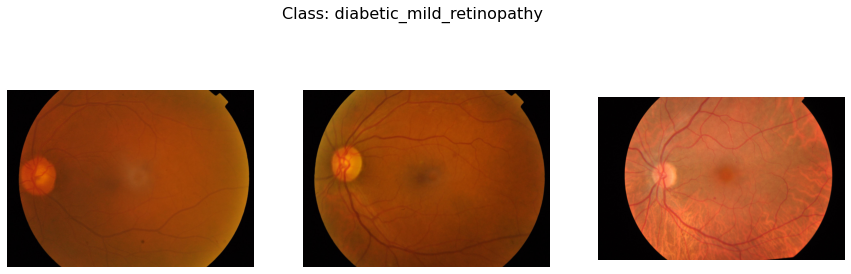

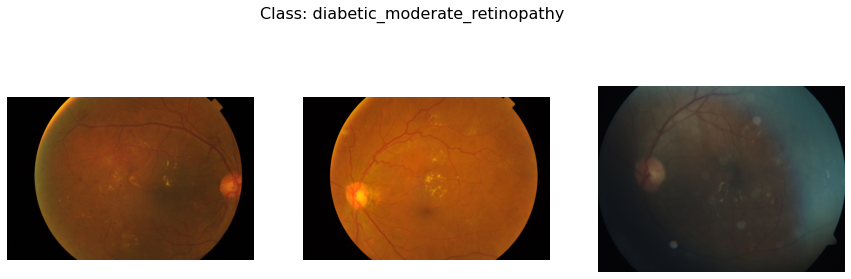

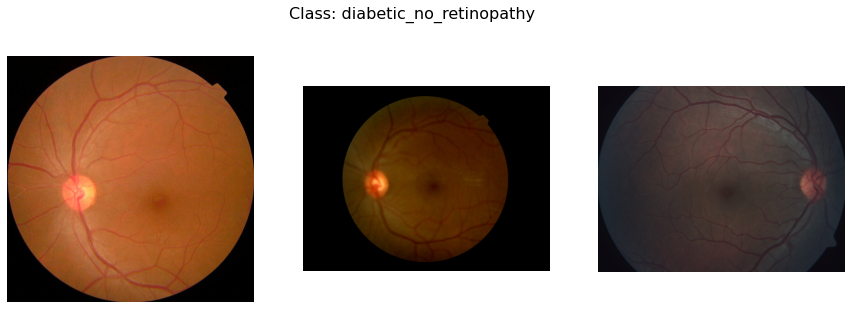

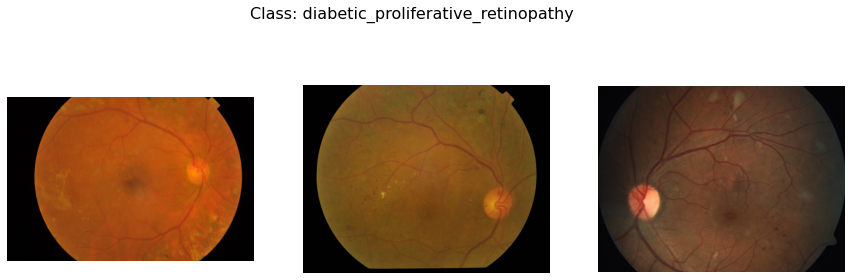

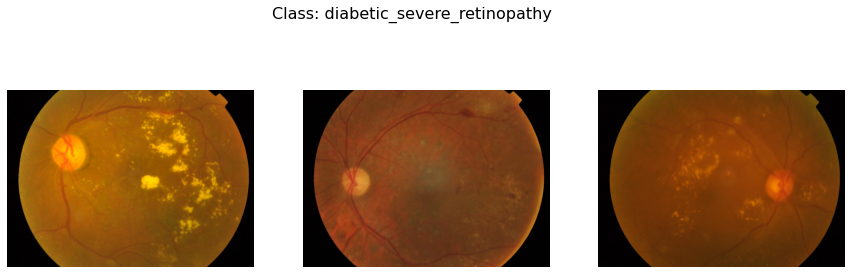

In [59]:
dataset_path = '/projects/academic/shamsadp/medxformer/diabetic'

def visualize_samples(dataset_path, samples_per_class=3):
    classes = os.listdir(dataset_path)
    for class_name in classes:
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            image_files = os.listdir(class_dir)[:samples_per_class]  
            fig, axes = plt.subplots(1, samples_per_class, figsize=(15, 5))
            fig.suptitle(f"Class: {class_name}", fontsize=16)
            
            for i, image_file in enumerate(image_files):
                img_path = os.path.join(class_dir, image_file)
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].axis('off')
            
            plt.show()

visualize_samples(dataset_path)

#### Brain Tumor MRI Dataset - Sample Visualizations

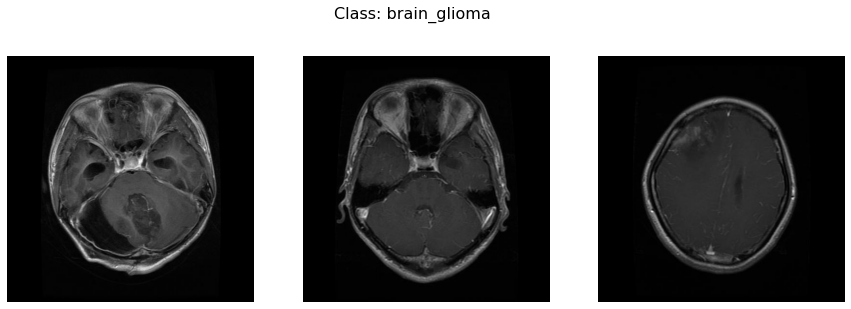

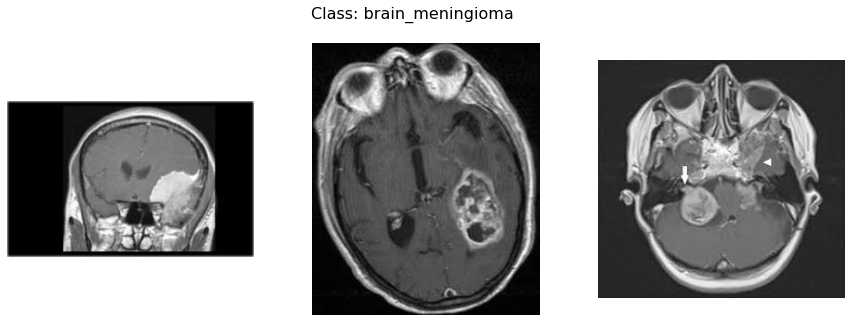

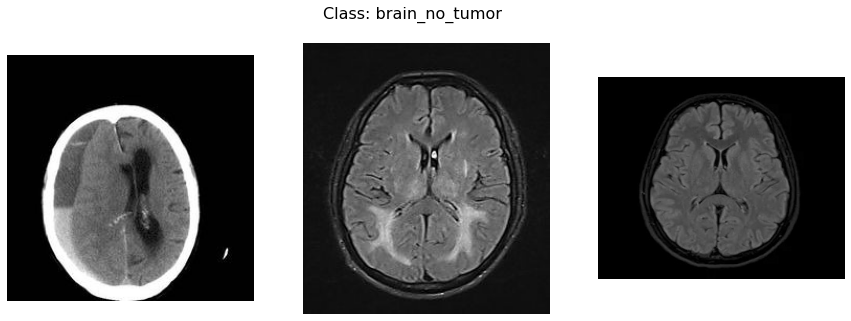

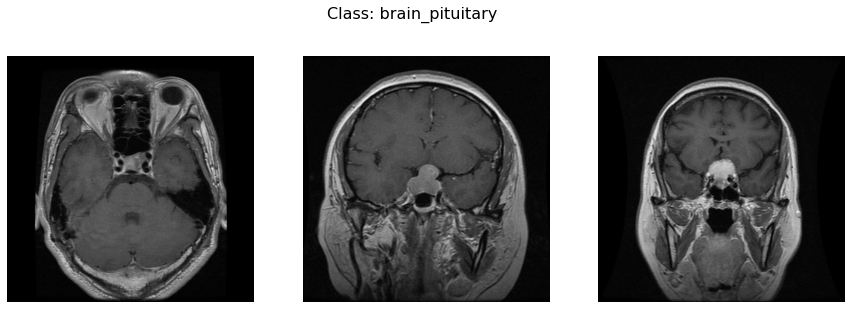

In [60]:
dataset_path = '/projects/academic/shamsadp/medxformer/brain'

def visualize_samples(dataset_path, samples_per_class=3):
    classes = os.listdir(dataset_path)
    for class_name in classes:
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            image_files = os.listdir(class_dir)[:samples_per_class]  
            fig, axes = plt.subplots(1, samples_per_class, figsize=(15, 5))
            fig.suptitle(f"Class: {class_name}", fontsize=16)
            
            for i, image_file in enumerate(image_files):
                img_path = os.path.join(class_dir, image_file)
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].axis('off')
            
            plt.show()
visualize_samples(dataset_path)

#### CT KIDNEY DATASET: Normal-Cyst-Tumor and Stone - Sample Visualizations

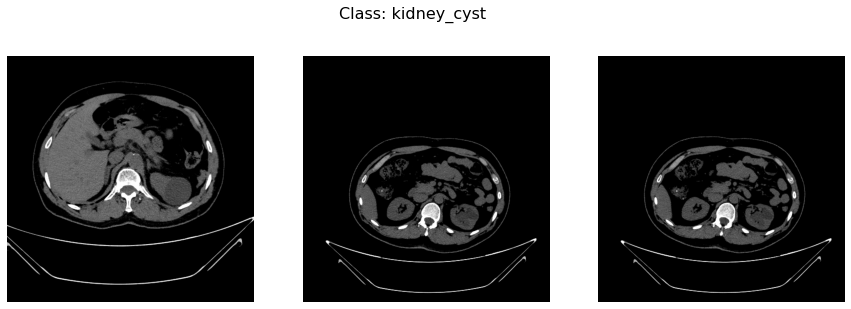

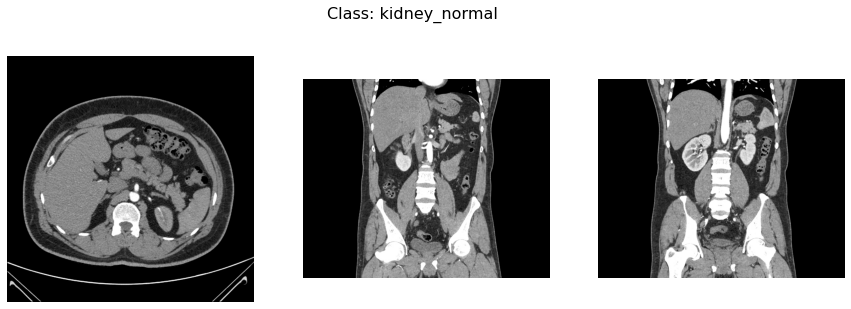

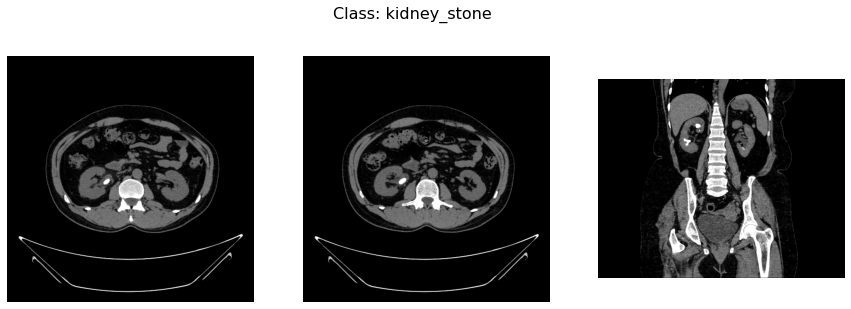

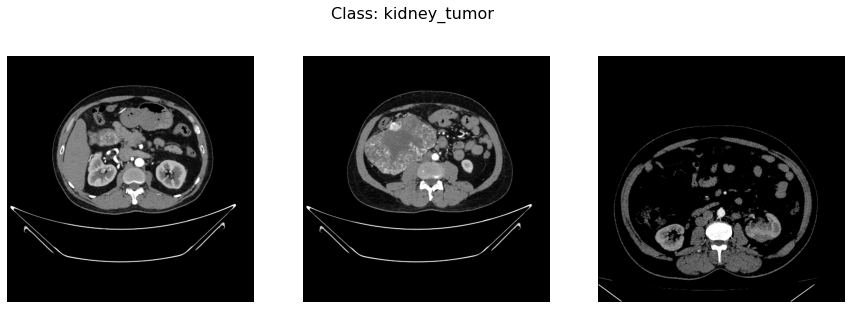

In [61]:
dataset_dir = '/projects/academic/shamsadp/medxformer/kidney'
def visualize_samples(dataset_dir, num_samples=3):
    classes = os.listdir(dataset_dir)
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            image_files = os.listdir(class_dir)
            image_files = image_files[:num_samples] 
            fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
            fig.suptitle(f"Class: {class_name}", fontsize=16)
            
            for i, img_file in enumerate(image_files):
                img_path = os.path.join(class_dir, img_file)
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].axis('off')
            
            plt.show()
visualize_samples(dataset_dir)


#### Skin Cancer ISIC - Sample Visualizations

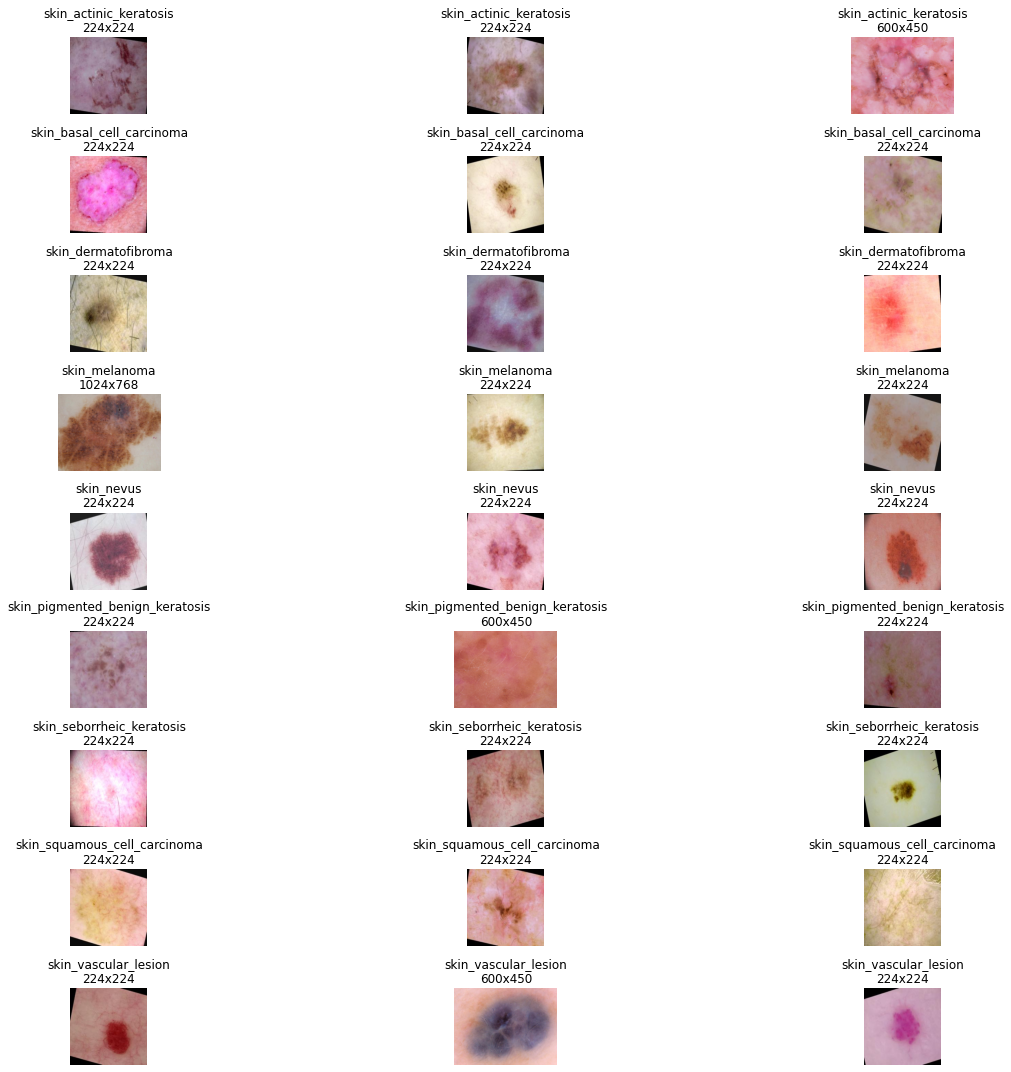

In [62]:
skin_cancer_dir = '/projects/academic/shamsadp/medxformer/skin'

def visualize_samples_with_size(dataset_dir, samples_per_class=3):
    classes = os.listdir(dataset_dir)
    plt.figure(figsize=(20, 15))  
    
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_dir)
        
        selected_images = random.sample(image_files, min(samples_per_class, len(image_files)))
        for i, image_file in enumerate(selected_images):
            img_path = os.path.join(class_dir, image_file)
            img = Image.open(img_path)
            width, height = img.size
            plt.subplot(len(classes), samples_per_class, class_idx * samples_per_class + i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{class_name}\n{width}x{height}", fontsize=12)  # Increase font size for better readability
    
    plt.tight_layout()
    plt.show()

visualize_samples_with_size(skin_cancer_dir, 3)


#### Retinal OCT Images (optical coherence tomography) - Sample Visualizations

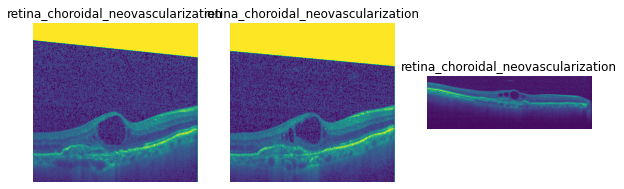

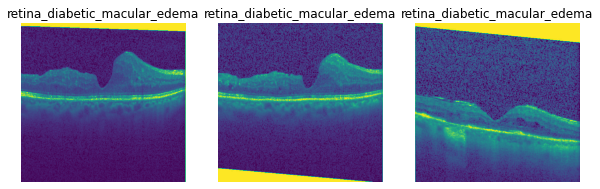

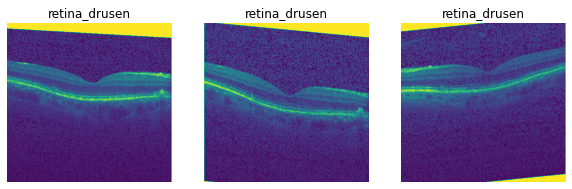

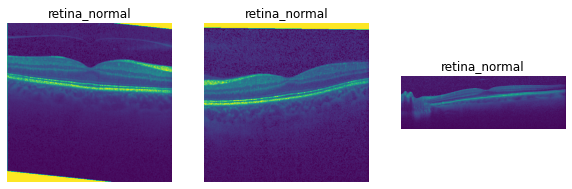

In [63]:
retina_dir = '/projects/academic/shamsadp/medxformer/retina'

def visualize_samples_from_retina(dataset_dir, samples_per_class=3):
    class_names = os.listdir(dataset_dir)
    
    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):            
            image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            selected_images = image_files[:samples_per_class]
            plt.figure(figsize=(10, 5))
            for i, image_file in enumerate(selected_images):
                image_path = os.path.join(class_dir, image_file)
                img = Image.open(image_path)
                plt.subplot(1, samples_per_class, i + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
            plt.show()
visualize_samples_from_retina(retina_dir, samples_per_class=3)


In [64]:
base_dir = '/projects/academic/shamsadp/medxformer'
output_zip = '/projects/academic/shamsadp/medxformer.zip'

shutil.make_archive(base_dir, 'zip', base_dir)

final_zip_path = f"{base_dir}.zip"
if os.path.exists(final_zip_path):
    print(f"Zipped successfully to: {final_zip_path}")
else:
    print("There was an error creating the zip file.")


Zipped successfully to: /projects/academic/shamsadp/medxformer.zip


In [65]:
directory_to_clear = "/projects/academic/shamsadp/medxformer_input/"

if os.path.exists(directory_to_clear):
    for item in os.listdir(directory_to_clear):
        item_path = os.path.join(directory_to_clear, item)
        try:
            if os.path.isdir(item_path):
                shutil.rmtree(item_path)
            else:
                os.remove(item_path)
            print(f"Deleted: {item_path}")
        except Exception as e:
            print(f"Failed to delete {item_path}. Reason: {e}")
else:
    print(f"The directory {directory_to_clear} does not exist.")

Deleted: /projects/academic/shamsadp/medxformer_input/brain
Deleted: /projects/academic/shamsadp/medxformer_input/diabetes
Deleted: /projects/academic/shamsadp/medxformer_input/kidney
Deleted: /projects/academic/shamsadp/medxformer_input/retina
Deleted: /projects/academic/shamsadp/medxformer_input/skin
